# Evaluation of hypertuning of instance segmentation
Here we will create tools for detailed evaluation of the results:
- analyse how parameters in hypertune affect segmentation quality

### Contents:
1. <a href=#1>Analyse how watershed parameters affect segmentation quality</a> 

In [1]:
from notebook_utils import *

import imageio
import skimage.segmentation
import skimage.filters

import scipy.stats

import random

import os
import shutil
import glob

%matplotlib inline

# Loading and setting up data paths <a name='1' />

In [2]:
dir_root = r'D:\Fafa\MIT\CellDx\watersheds\hypersearch\_search_0.4'

name_model5 = 'model5_watershed_val'
name_DCAN = 'DCAN_watershed_val'
name_model6 = 'model6_water'
report_path = os.path.join(dir_root, name_model5, 'Sensible Report.csv')

# Analyse how watershed parameters affect segmentation quality

In [3]:
def split_and_add_params(data):
    params = watershed_params['Algorithm'].str.split("_")
    params_len = params.str.len()[0] / 2
    for i in range(int(params_len)):
        name = params.str.get(i*2)[0]
        data[name] = params.str.get(i*2+1)
        if name != 'intense':
            data[name] = data[name].apply(pandas.to_numeric)
        else:
            data[name] = data[name].map({'True': 1, 'False': 0})

In [4]:
import pandas

watershed_params = pandas.read_csv(report_path, sep=',')
split_and_add_params(watershed_params)
print (len(watershed_params))
watershed_params[:3]

1558


,Algorithm,Precision,Recall,Segmentation,thresh,med,peak,smo,intense,zs
0,thresh_0.2_med_1_peak_3_smo_1_intense_False_zs...,0.631767,0.775150,0.696152,0.2,1.0,3.0,1.0,0.0,0.1
1,thresh_0.2_med_1_peak_3_smo_1_intense_False_zs...,0.620438,0.784870,0.693034,0.2,1.0,3.0,1.0,0.0,0.2
2,thresh_0.2_med_1_peak_3_smo_1_intense_False_zs...,0.621327,0.794751,0.697420,0.2,1.0,3.0,1.0,0.0,0.3


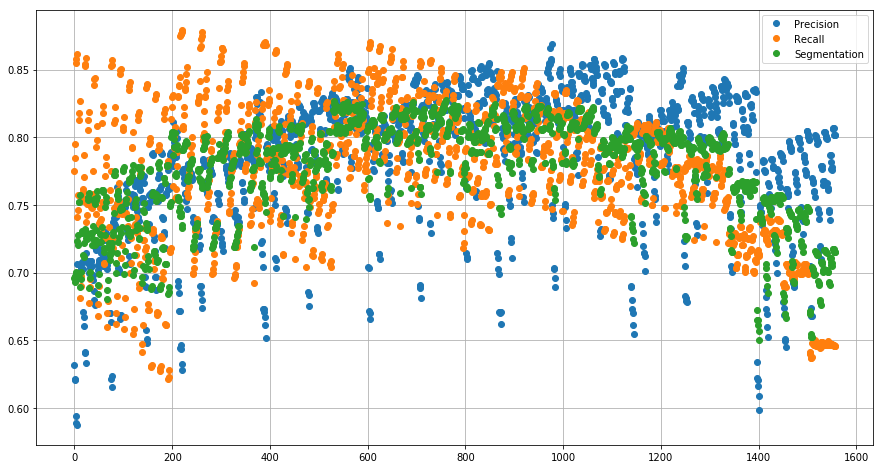

In [5]:
watershed_params[['Precision', 'Recall','Segmentation']].plot(x=None,  figsize=(15, 8), grid=True,style='o')

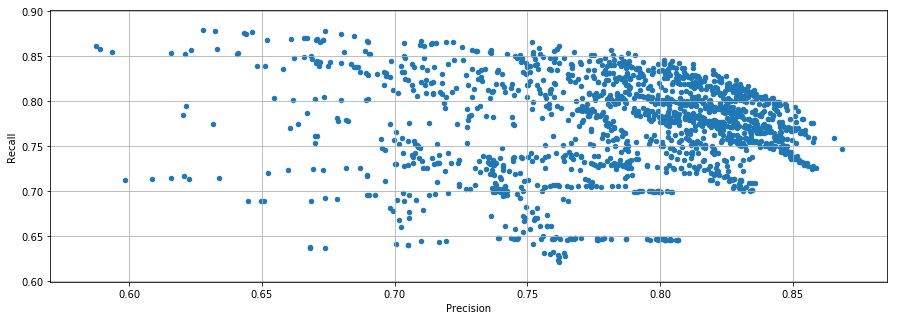

In [6]:
watershed_params.plot.scatter('Precision', 'Recall', figsize=(15, 5), grid=True,style='o')

In [7]:
watershed_params.sort_values('Segmentation', ascending=0)[:10]

,Algorithm,Precision,Recall,Segmentation,thresh,med,peak,smo,intense,zs
760,thresh_0.4_med_3_peak_7_smo_2_intense_True_zs_0.5,0.820092,0.834440,0.827204,0.40,3.0,7.0,2.0,1.0,0.5
531,thresh_0.45_med_1_peak_11_smo_1_intense_True_z...,0.812451,0.841406,0.826675,0.45,1.0,11.0,1.0,1.0,0.4
692,thresh_0.4_med_3_peak_11_smo_1_intense_True_zs...,0.824697,0.827636,0.826164,0.40,3.0,11.0,1.0,1.0,0.4
558,thresh_0.45_med_3_peak_11_smo_1_intense_True_z...,0.828446,0.823749,0.826090,0.45,3.0,11.0,1.0,1.0,0.4
759,thresh_0.4_med_3_peak_7_smo_2_intense_True_zs_0.4,0.820874,0.830714,0.825765,0.40,3.0,7.0,2.0,1.0,0.4
758,thresh_0.4_med_3_peak_7_smo_2_intense_True_zs_0.3,0.819984,0.830876,0.825394,0.40,3.0,7.0,2.0,1.0,0.3
534,thresh_0.45_med_1_peak_11_smo_2_intense_True_z...,0.830052,0.819699,0.824843,0.45,1.0,11.0,2.0,1.0,0.4
860,thresh_0.5_med_1_peak_11_smo_2_intense_True_zs...,0.832975,0.816783,0.824800,0.50,1.0,11.0,2.0,1.0,0.4
550,thresh_0.45_med_1_peak_9_smo_2_intense_True_zs...,0.821779,0.827636,0.824697,0.45,1.0,9.0,2.0,1.0,0.2
588,thresh_0.4_med_1_peak_11_smo_1_intense_True_zs...,0.807292,0.842864,0.824695,0.40,1.0,11.0,1.0,1.0,0.4


In [8]:
watershed_params.sort_values('Segmentation', ascending=1)[:10]

,Algorithm,Precision,Recall,Segmentation,thresh,med,peak,smo,intense,zs
1401,thresh_0.7_med_1_peak_3_smo_1_intense_True_zs_0.3,0.598502,0.712133,0.650392,0.7,1.0,3.0,1.0,1.0,0.3
1508,thresh_0.7_med_5_peak_3_smo_1_intense_True_zs_0.2,0.668082,0.637129,0.652239,0.7,5.0,3.0,1.0,1.0,0.2
1509,thresh_0.7_med_5_peak_3_smo_1_intense_True_zs_0.3,0.668194,0.637777,0.652632,0.7,5.0,3.0,1.0,1.0,0.3
1507,thresh_0.7_med_5_peak_3_smo_1_intense_True_zs_0.1,0.673753,0.636643,0.654673,0.7,5.0,3.0,1.0,1.0,0.1
1400,thresh_0.7_med_1_peak_3_smo_1_intense_True_zs_0.2,0.608702,0.713915,0.657124,0.7,1.0,3.0,1.0,1.0,0.2
1398,thresh_0.7_med_1_peak_3_smo_1_intense_False_zs...,0.615922,0.714401,0.661517,0.7,1.0,3.0,1.0,0.0,0.3
1397,thresh_0.7_med_1_peak_3_smo_1_intense_False_zs...,0.622439,0.713591,0.664906,0.7,1.0,3.0,1.0,0.0,0.2
1399,thresh_0.7_med_1_peak_3_smo_1_intense_True_zs_0.1,0.620564,0.716669,0.665163,0.7,1.0,3.0,1.0,1.0,0.1
1455,thresh_0.7_med_3_peak_3_smo_1_intense_True_zs_0.3,0.644936,0.689130,0.666301,0.7,3.0,3.0,1.0,1.0,0.3
1454,thresh_0.7_med_3_peak_3_smo_1_intense_True_zs_0.2,0.649680,0.689778,0.669129,0.7,3.0,3.0,1.0,1.0,0.2


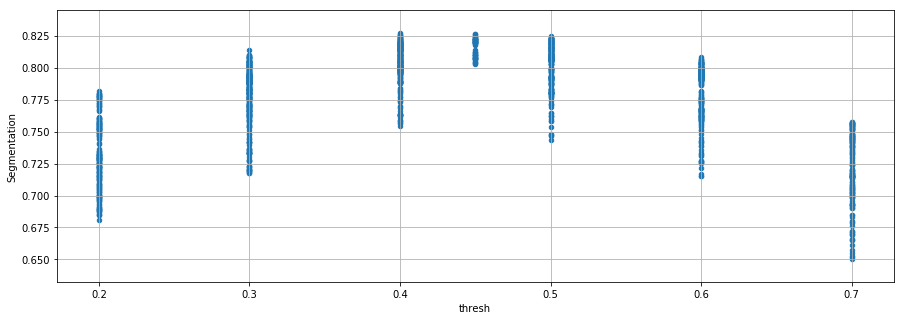

In [9]:
watershed_params.plot.scatter('thresh', 'Segmentation', figsize=(15, 5), grid=True,style='o')

## Check effect of particular parameter

In [10]:
def plot_it(data_grouped):
    data_grouped.plot(y=['Segmentation','Recall','Precision'])

In [11]:
watershed_params.groupby('zs').mean()

,Precision,Recall,Segmentation,thresh,med,peak,smo,intense
zs,,,,,,,,
0.001,0.778400,0.783431,0.779210,0.389706,1.647059,5.764706,2.500000,0.529412
0.050,0.791878,0.801966,0.794555,0.446429,2.142857,7.214286,1.785714,0.571429
0.100,0.782474,0.764519,0.771589,0.441646,2.767554,5.852300,2.077482,0.493947
0.200,0.783353,0.769534,0.774590,0.443333,2.697778,6.111111,2.077778,0.546667
0.300,0.781750,0.772657,0.775281,0.442222,2.720000,6.182222,2.075556,0.548889
0.400,0.808169,0.808017,0.807305,0.450000,2.000000,9.000000,2.000000,1.000000
0.500,0.769172,0.795838,0.780291,0.374545,1.581818,6.127273,2.436364,0.490909


C:\Anacondas\2.5.0\envs\neptune3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


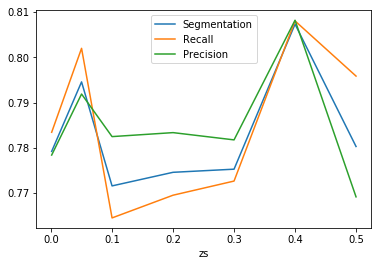

In [12]:
plot_it(watershed_params.groupby('zs').mean())

In [13]:
watershed_params.groupby(['intense']).mean()

,Precision,Recall,Segmentation,thresh,med,peak,smo,zs
intense,,,,,,,,
0.0,0.787034,0.755382,0.769543,0.438372,2.656977,5.834302,2.119186,0.199465
1.0,0.780742,0.787818,0.782298,0.438106,2.531178,6.554273,2.081986,0.224060


C:\Anacondas\2.5.0\envs\neptune3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


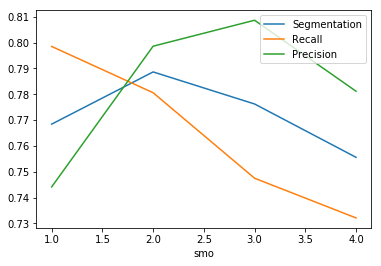

In [14]:
plot_it(watershed_params.groupby('smo').mean())

C:\Anacondas\2.5.0\envs\neptune3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


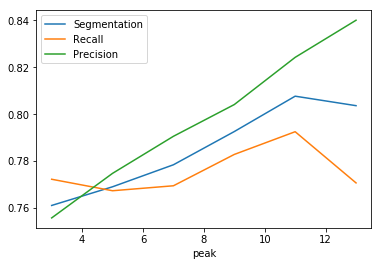

In [15]:
plot_it(watershed_params.groupby('peak',).mean())

C:\Anacondas\2.5.0\envs\neptune3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


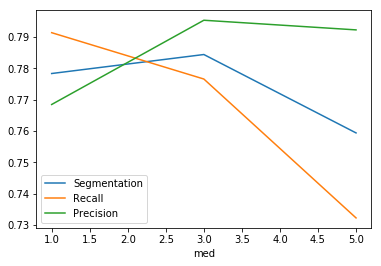

In [16]:
plot_it(watershed_params.groupby('med').mean())

C:\Anacondas\2.5.0\envs\neptune3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


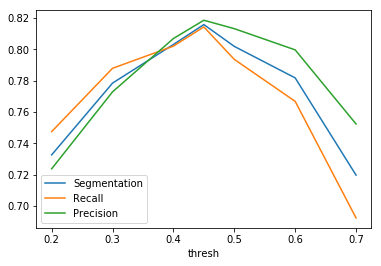

In [17]:
plot_it(watershed_params.groupby('thresh').mean())

## Use random forest to predict good parameters (IN PROGRESS)

In [18]:
import sklearn
from sklearn.ensemble import RandomForestRegressor

In [147]:
regr = RandomForestRegressor(100)

X = watershed_params[['thresh','med','peak','smo','intense','zs']]
Y = watershed_params['Segmentation']

In [148]:
regr.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [149]:
regr.score(X,Y)

0.99660514502211239

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

regr = RandomForestRegressor(100)
regr.fit(X_train,y_train)
regr.score(X_test,y_test)

0.93207101314078156

In [153]:
Y_predict = np.array(regr.predict(X_test))
y_test_arr = np.array(y_test)
np.count_nonzero(np.abs(Y_predict - y_test_arr) > 0.02)

0

## Use forest for search

In [154]:
import itertools
meds = [1,3,5,7]
peaks = [2,3,4,5,6,7,8,9]
smo = [1,2,3,4,5,6,7,8]
intense = [0, 1]
thresh = np.arange(0.3,0.6, 0.05)
z_step = np.arange(0.05,0.2, 0.05)

watershed_params.sort_values('Segmentation', ascending=0)[:1]

,Algorithm,Precision,Recall,Segmentation,thresh,med,peak,smo,intense,zs
56,thresh_0.45_med_1_peak_11_smo_1_intense_True_z...,0.812451,0.841406,0.826675,0.45,1,11,1,1,0.4


In [160]:
print(X[:1])
regr.predict([[3, 7, 2, 1, 0.5, 0.4]])

   thresh  med  peak  smo  intense   zs
0     0.3    1    11    1        1  0.2


array([ 0.77511188])

In [175]:
import scipy
from scipy.optimize import basinhopping, differential_evolution



def eval(param):
    return -regr.predict([param])

differential_evolution(eval, [(0.2,0.6),(1, 5),(7,13),(0.3, 5),(1,1.1),(0.05, 0.8)], popsize=100,maxiter=10000, polish=True,disp=True)

differential_evolution step 1: f(x)= -0.825417
differential_evolution step 2: f(x)= -0.825417


     fun: -0.82541731166691434
 message: 'Optimization terminated successfully.'
    nfev: 1807
     nit: 2
 success: True
       x: array([  0.41396324,   3.51960221,  12.56586882,   1.34917542,
         1.0311464 ,   0.37960706])